<font size="5"> This python notebook focuses on plotting cumulative area distribution for a given experiment.</font><br> The fragment area of the experiment has been computed <i>a priori</i> and stored in a <<i>test_name</i>>_area.mat file.

In [11]:
from scipy.optimize import curve_fit
import pickle
import numpy as np
import matplotlib.pyplot as plt

Custom mplstyle file for plot formatting

In [12]:
mplstyle_file = r'C:\Users\vinee\OneDrive\Documents\vscode\stressed network model\article_preprint.mplstyle'
plt.style.use(f'{mplstyle_file}')

Read data from .txt file

In [ ]:
filename = 'test8_area'
data_dir_path = r'C:\Users\vinee\OneDrive\Documents\MATLAB\experiment_data\area'
with open(data_dir_path + f'/{filename}.txt', 'r') as f:
    size = f.readlines()

size = [float(s.strip()) for s in size]
print(f'Total fragments: {len(size)}')

Setting the minimum cut-off area below that will not be considered. Below is the list of the cut-off used:<br>
- $A_{\rm{cut-off}} = 2$ $\text{mm}^2$ for our impact experiments<br> 
- $A_{\rm{cut-off}} = 0.1$ $\text{mm}^2$ for Tandon and Glass (2015)<br>
- $A_{\rm{cut-off}} = 2.86$ $\text{mm}^2$ for Zijlstra and Burggraaf (1969)<br>

In [ ]:
cut_off_area = 2
size_cut_off = [s for s in size if s >= cut_off_area]

max_size = max(size_cut_off)
min_size = min(size_cut_off)
print(f'Min size: {min_size}, Max size: {max_size}')
print(f'Total fragments above cut-off: {len(size_cut_off)}')

Check area distribution (optional) so see how data is distributed

In [ ]:
bins = np.arange(cut_off_area, max(size_cut_off), 1)
y,x = np.histogram(size_cut_off, bins=bins)
x = (x[:-1] + x[1:]) / 2  # bin
fig, ax = plt.subplots()

# plot as a histogram
# counts, bins, patches = ax.hist(size, bins=bins, edgecolor='black', weights=np.ones(len(size)) / len(size))

# plot as a curve
ax.plot(x, y, marker='o', linestyle='None', color='blue', label='data', markersize=4)

ax.set_xlabel(r'$A (\rm{mm}^2)\rightarrow$')
ax.set_ylabel(r'frac. fragments')

# if required, plot in log scale
# ax.set_yscale('log')

# ax.set_xlim([0, 1])
# fig.savefig(data_dir_path+ '/test3_power_2cut_area5.png', dpi=300, bbox_inches='tight')
plt.show()

Remove largest fragment area, if required. Usually, it is removed if there is single large fragment so as it does not affect fitting. We can also remove fragment area above certain upper limit. This is accomplished by eyeballing.


In [ ]:
# if you want to remove the largest area
# size_range = [s for s in size_cut_off if s!=max_size]
# upper_limit = max_size

# if you want to put upper limit
# upper_limit = 60
# size_range = [s for s in size_cut_off if s <= upper_limit]

# if no upper limit, just use the original size
size_range = size_cut_off
upper_limit = 0

max_size = max(size_range)
min_size = min(size_range)
print(f'amin: {min_size}, amax: {max_size}')
print(f'Total fragments: {len(size_range)}')

Finding cumulative fragment area. <span style="color:rgb(255, 139, 30);"> Make sure to properly choose step size of distribution. </span>

In [ ]:
# find cumulative area distribution
cum_area = np.arange(min_size, max_size, 1)
cum_count = np.zeros_like(cum_area)
for i in range(len(cum_area)):
    cum_count[i] = len([s for s in size_range if s >= cum_area[i]])

total_count = cum_count[0]
print(total_count)

Define exponential fitting function

In [ ]:
# fit exponential function to the data
def exp_fit(x, a, b):
    return a*np.exp(b*x)

Performing curve fit operation on the experimental data

In [ ]:
p, p_cov = curve_fit(exp_fit, cum_area, cum_count/total_count, p0=[1, -0.1])
print('Fitted parameters: a = ', p[0], ', b = ', p[1])
print('Covariance of parameters:', np.sqrt(np.diag(p_cov)))

# compute R^2
y_predicted = exp_fit(cum_area, *p)
ss_tot = np.sum((cum_area - np.mean(cum_area))**2)
ss_res = np.sum((cum_count/total_count - y_predicted)**2)
r_squared = 1 - (ss_res / ss_tot)
print(f'R^2: {r_squared}')

Plotting result

In [ ]:
save_path = r'C:\Users\vinee\OneDrive\Documents\MATLAB\experiment_data\area\results'

fig, ax = plt.subplots()
ax.plot(cum_area, cum_count/total_count, color='black', linestyle = 'none', markersize = 5, marker = 'o')
ax.plot(cum_area, exp_fit(cum_area, p[0], p[1]), color='tab:blue')
ax.set_xlabel(r'$A (\rm{mm}^2)\rightarrow$')
ax.set_ylabel(r'frac. of cum. fragments')

# if requried semilog scale
ax.set_yscale('log')

ax.text(
    0.05, 0.05,
    r"test name: Test 8"
    + "\n"
    + r"$R^2$: {:.4f}".format(r_squared)
    + "\n"
    + r"$a$: {:.4f}, $b$: {:.4f}".format(p[0], p[1])
    + "\n"
    + r"$A$-cut-off: {} mm$^2$".format(cut_off_area)
    + "\n"
    + r"upper-limit: $\leq ${:.2f} mm$^2$".format(upper_limit)
    + "\n"
    + r"total fragments: {}".format(int(total_count))
    + "\n"
    + r"$A$-mean: {:.2f} mm$^2$".format(np.mean(size_range)),
    transform=ax.transAxes,
    fontsize=12,
    verticalalignment='bottom',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.7)
)

fig.savefig(save_path+ f'/{filename}.png', dpi=300, bbox_inches='tight')
plt.show()

Save the fit data if needed

In [ ]:
save_path = r'C:\Users\vinee\OneDrive\Documents\MATLAB\experiment_data\area\results'

with open(save_path + f'/{filename}_cum_area', 'wb') as f:
    pickle.dump([cum_area, cum_count, p, p_cov, size_range], f)

<font size="5"> <span style="color:rgb(255, 139, 30);"> Collate all experimental data into single plot </span>

First, we will read our impact experimental data. 

Fit parameters for v = 34: [ 1.10352301 -0.07691184], [[ 9.52864221e-05 -6.63669464e-06]
 [-6.63669464e-06  1.00029956e-06]]
Fit parameters for v = 20: [ 1.12315763 -0.066825  ], [[ 1.26244765e-04 -7.53013953e-06]
 [-7.53013953e-06  9.59519090e-07]]


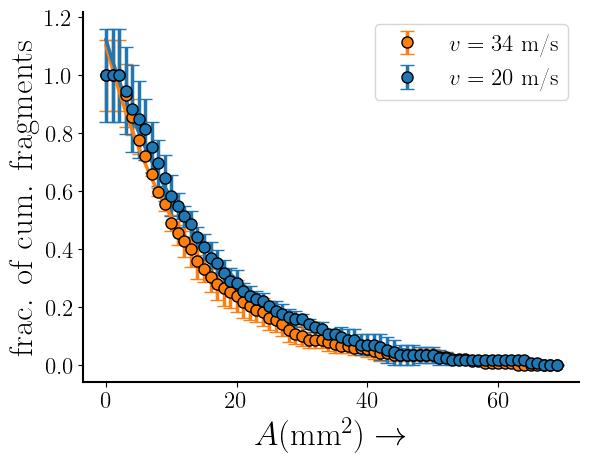

In [119]:
read_path = r'C:\Users\vinee\OneDrive\Documents\MATLAB\experiment_data\area\results'
save_path = r'C:\Users\vinee\OneDrive\Documents\MATLAB\experiment_data\area\results\collated'

# For v = 34
filename = 'test1_area_cum_area'
with open(read_path + f'/{filename}', 'rb') as f:
    cum_area1, cum_count1, p1, p_conv1, area1 = pickle.load(f)

filename = 'test2_area_cum_area'
with open(read_path + f'/{filename}', 'rb') as f:
    cum_area2, cum_count2, p2, p_conv2, area2 = pickle.load(f)

filename = 'test3_area_cum_area'
with open(read_path + f'/{filename}', 'rb') as f:
    cum_area3, cum_count3, p3, p_conv3, area3 = pickle.load(f)

# For v = 20
filename = 'test6_area_cum_area'
with open(read_path + f'/{filename}', 'rb') as f:
    cum_area6, cum_count6, p6, p_conv6, area6 = pickle.load(f)

filename = 'test7_area_cum_area'
with open(read_path + f'/{filename}', 'rb') as f:
    cum_area7, cum_count7, p7, p_conv7, area7 = pickle.load(f)

filename = 'test8_area_cum_area'
with open(read_path + f'/{filename}', 'rb') as f:
    cum_area8, cum_count8, p8, p_conv8, area8 = pickle.load(f)

# find average of (1,2,3)
min_area = min([min(area1), min(area2), min(area3)])
max_area = max([max(area1), max(area2), max(area3)])

cum_area123 = np.arange(0, 70, 1)
cum_count123 = np.zeros_like(cum_area123)
cum_count123_std = np.zeros_like(cum_area123)
for i in range(len(cum_area123)):
    count1 = len([s for s in area1 if s >= cum_area123[i]])
    count2 = len([s for s in area2 if s >= cum_area123[i]])
    count3 = len([s for s in area3 if s >= cum_area123[i]])
    cum_count123[i] = (count1 + count2 + count3)/3
    cum_count123_std[i] = np.std([count1, count2, count3], axis=0)

# find average of (6,7,8)
min_area = min([min(area6), min(area7), min(area8)])
max_area = max([max(area6), max(area7), max(area8)])
cum_area678 = np.arange(0, 70, 1)
cum_count678 = np.zeros_like(cum_area678)
cum_count678_std = np.zeros_like(cum_area678)
for i in range(len(cum_area678)):
    count6 = len([s for s in area6 if s >= cum_area678[i]])
    count7 = len([s for s in area7 if s >= cum_area678[i]])
    count8 = len([s for s in area8 if s >= cum_area678[i]])
    cum_count678[i] = (count6 + count7 + count8)/3
    cum_count678_std[i] = np.std([count6, count7, count8], axis=0)

p1, p_conv1 = curve_fit(exp_fit, cum_area123, cum_count123/cum_count123[0], p0=[1, -0.1])
print(f'Fit parameters for v = 34: {p1}, {p_conv1}')

p2, p_conv2 = curve_fit(exp_fit, cum_area678, cum_count678/cum_count678[0], p0=[1, -0.1])
print(f'Fit parameters for v = 20: {p2}, {p_conv2}')

# We can separate plot and check
fig, ax = plt.subplots()
# Uncomment for shaded band for error bars
# ax.plot(cum_area678, cum_count678/cum_count678[0], color='tab:blue', linestyle = 'none', markersize = 5, marker = 'o', label=r'$v = 20$ m/s', markeredgecolor='black')
# ax.plot(cum_area123, cum_count123/cum_count123[0], color ='tab:orange', linestyle = 'none', markersize = 5, marker = 'o', label=r'$v = 34$ m/s', markeredgecolor='black')
# ax.fill_between(cum_area123, (cum_count123 - cum_count123_std)/cum_count123[0], (cum_count123 + cum_count123_std)/cum_count123[0], color='tab:orange', alpha=0.3)
# ax.fill_between(cum_area678, (cum_count678 - cum_count678_std)/cum_count678[0], (cum_count678 + cum_count678_std)/cum_count678[0], color='tab:blue', alpha=0.3)

# Plot with error bars
ax.errorbar(cum_area123, cum_count123/cum_count123[0], yerr=cum_count123_std/cum_count123[0], ecolor='tab:orange', capsize=5,
            linestyle='none', marker='o', markersize=8, color='tab:orange', label=r'$v = 34$ m/s', markeredgecolor='black')
ax.errorbar(cum_area678, cum_count678/cum_count678[0], yerr=cum_count678_std/cum_count678[0], ecolor='tab:blue', capsize=5,
               linestyle='none', marker='o', markersize=8, color='tab:blue', label=r'$v = 20$ m/s', markeredgecolor='black')
ax.plot(cum_area123, exp_fit(cum_area123, p1[0], p1[1]), color='tab:orange')
ax.plot(cum_area678, exp_fit(cum_area678, p2[0], p2[1]), color='tab:blue')

ax.legend()

# Uncomment for semilog yscale
# ax.set_yscale('log')

ax.set_xlabel(r'$A (\rm{mm}^2)\rightarrow$')
ax.set_ylabel(r'frac. of cum. fragments')
fig.savefig(save_path+ '/exp_cum_area_avg.png', dpi=300, bbox_inches='tight')
plt.show()

Second, we load literature data

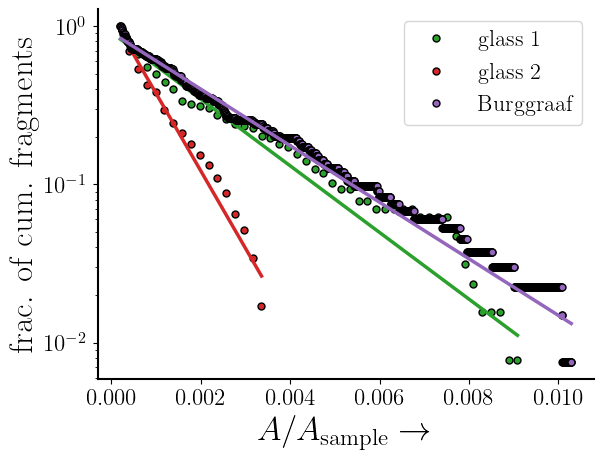

In [38]:
read_path = r'C:\Users\vinee\OneDrive\Documents\MATLAB\experiment_data\area\results'

# literature data
filename = 'glass1_area_cum_area'
with open(read_path + f'/{filename}', 'rb') as f:
    cum_area_glass1, cum_count_glass1, p_glass1, p_conv_glass1, area_glass1 = pickle.load(f)

filename = 'glass2_area_cum_area'
with open(read_path + f'/{filename}', 'rb') as f:
    cum_area_glass2, cum_count_glass2, p_glass2, p_conv_glass2, area_glass2 = pickle.load(f)

filename = 'burggraaf_area_cum_area'
with open(read_path + f'/{filename}', 'rb') as f:
    cum_area_burggraaf, cum_count_burggraaf, p_burggraaf, p_conv_burggraaf, area_burggraaf = pickle.load(f)

# We can separate plot and check
fig, ax = plt.subplots()
A_glass = (np.pi/4)*25.4**2
# plot the data for glass 1
ax.plot(cum_area_glass1/A_glass, cum_count_glass1/cum_count_glass1[0], color='tab:green', linestyle = 'none', markersize = 5, marker = 'o', label=r'glass 1', markeredgecolor='black')
ax.plot(cum_area_glass1/A_glass, exp_fit(cum_area_glass1, p_glass1[0], p_glass1[1]), color='tab:green')
# plot the data for glass 2
ax.plot(cum_area_glass2/A_glass, cum_count_glass2/cum_count_glass2[0], color='tab:red', linestyle = 'none', markersize = 5, marker = 'o', label=r'glass 2', markeredgecolor='black')
ax.plot(cum_area_glass2/A_glass, exp_fit(cum_area_glass2, p_glass2[0], p_glass2[1]), color='tab:red')

A_burggraaf = (np.pi/4)*135**2
# plot the data for burggraaf
ax.plot(cum_area_burggraaf/A_burggraaf, cum_count_burggraaf/cum_count_burggraaf[0], color='tab:purple', linestyle = 'none', markersize = 5, marker = 'o', label=r'Burggraaf', markeredgecolor='black')
ax.plot(cum_area_burggraaf/A_burggraaf, exp_fit(cum_area_burggraaf, p_burggraaf[0], p_burggraaf[1]), color='tab:purple')

ax.legend()

# Uncomment for semilog yscale
ax.set_yscale('log')

ax.set_xlabel(r'$A/A_{\rm{sample}}\rightarrow$')
ax.set_ylabel(r'frac. of cum. fragments')
# fig.savefig(r'C:\Users\vinee\OneDrive\Documents\MATLAB'+ '/exp_cum_area_literature.png', dpi=300, bbox_inches='tight')
plt.show()


Collate all the data in single plot

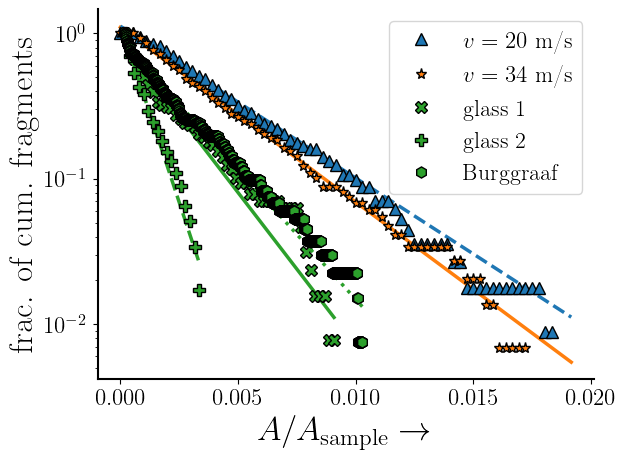

In [41]:
save_dir_path = r'C:\Users\vinee\OneDrive\Documents\MATLAB\experiment_data\area\results\collated'

fig, ax = plt.subplots()

ms = 8
mec = 'black'

# our experiment data
A0 = 60*60
# ax.errorbar(cum_area123/A0, cum_count123/cum_count123[0], yerr=cum_count123_std/cum_count123[0], ecolor='tab:orange', capsize=5,
#             linestyle='none', marker='*', markersize=ms, color='tab:orange', label=r'$v = 34$ m/s', mec=mec)
# ax.errorbar(cum_area678/A0, cum_count678/cum_count678[0], yerr=cum_count678_std/cum_count678[0], ecolor='tab:orange', capsize=5,
#             linestyle='none', marker='^', markersize=ms, color='tab:orange', label=r'$v = 20$ m/s', mec=mec)

ax.plot(cum_area123/A0, exp_fit(cum_area123, p1[0], p1[1]), color='tab:orange', linestyle='solid')
ax.plot(cum_area678/A0, exp_fit(cum_area678, p2[0], p2[1]), color='tab:blue', linestyle='dashed')
ax.plot(cum_area678/A0, cum_count678/cum_count678[0], color='tab:blue', linestyle='none',
         markersize=ms, marker='^', mec=mec, label = r'$v = 20$ m/s')
ax.plot(cum_area123/A0, cum_count123/cum_count123[0], color='tab:orange', linestyle='none',
         markersize=ms, marker='*', mec=mec, label =r'$v = 34$ m/s')


# literature data
A_glass = (np.pi/4)*25.4**2
# plot the data for glass 1
ax.plot(cum_area_glass1/A_glass, exp_fit(cum_area_glass1, p_glass1[0], p_glass1[1]), color='tab:green')
ax.plot(cum_area_glass1/A_glass, cum_count_glass1/cum_count_glass1[0], color='tab:green', linestyle='none',
         markersize=ms, marker='X', label=r'glass 1', mec=mec)

# plot the data for glass 2
ax.plot(cum_area_glass2/A_glass, exp_fit(cum_area_glass2, p_glass2[0], p_glass2[1]), color='tab:green', linestyle='dashed')
ax.plot(cum_area_glass2/A_glass, cum_count_glass2/cum_count_glass2[0], color='tab:green', linestyle='none', 
        markersize=ms, marker='P', label=r'glass 2', mec=mec)


A_burggraaf = (np.pi/4)*135**2
# plot the data for burggraaf
ax.plot(cum_area_burggraaf/A_burggraaf, exp_fit(cum_area_burggraaf, p_burggraaf[0], p_burggraaf[1]), color='tab:green',
         linestyle='dotted')
ax.plot(cum_area_burggraaf/A_burggraaf, cum_count_burggraaf/cum_count_burggraaf[0], color='tab:green', linestyle='none',
         markersize=ms, marker='h', label=r'Burggraaf', mec=mec)


ax.set_xlabel(r'$A/A_{\rm{sample}}\rightarrow$')
ax.set_ylabel(r'frac. of cum. fragments')
# ax.set_ylim(bottom=1e-3)
ax.set_yscale('log')    # Change to log scale for better visibility of small values

ax.legend()
# fig.savefig(save_dir_path+ '/experiment_literature.png', dpi=300, bbox_inches='tight')
plt.show()

<font size="5"> <span style="color:rgb(255, 139, 30);"> Plotting mean area and exponential coefficient </span>

Slope of the fit line: 1.0437735743584324


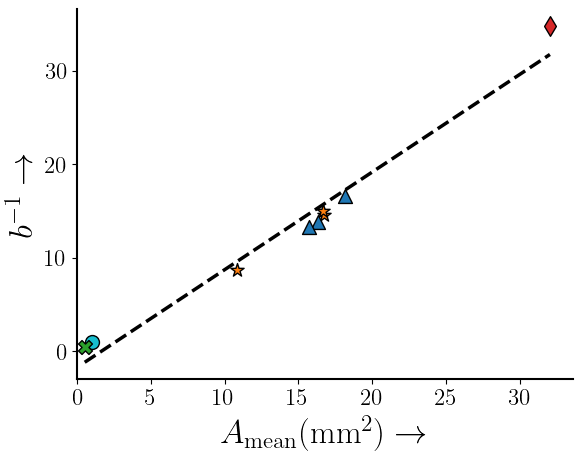

In [59]:
def get_amean_b(read_path):

    # For v = 34
    filename = 'test1_area_cum_area'
    with open(read_path + f'/{filename}', 'rb') as f:
        cum_area1, cum_count1, p1, p_conv1, area1 = pickle.load(f)

    filename = 'test2_area_cum_area'
    with open(read_path + f'/{filename}', 'rb') as f:
        cum_area2, cum_count2, p2, p_conv2, area2 = pickle.load(f)

    filename = 'test3_area_cum_area'
    with open(read_path + f'/{filename}', 'rb') as f:
        cum_area3, cum_count3, p3, p_conv3, area3 = pickle.load(f)

    # For v = 20
    filename = 'test6_area_cum_area'
    with open(read_path + f'/{filename}', 'rb') as f:
        cum_area6, cum_count6, p6, p_conv6, area6 = pickle.load(f)

    filename = 'test7_area_cum_area'
    with open(read_path + f'/{filename}', 'rb') as f:
        cum_area7, cum_count7, p7, p_conv7, area7 = pickle.load(f)

    filename = 'test8_area_cum_area'
    with open(read_path + f'/{filename}', 'rb') as f:
        cum_area8, cum_count8, p8, p_conv8, area8 = pickle.load(f)

    # literature data
    filename = 'glass1_area_cum_area'
    with open(read_path + f'/{filename}', 'rb') as f:
        cum_area_glass1, cum_count_glass1, p_glass1, p_conv_glass1, area_glass1 = pickle.load(f)

    filename = 'glass2_area_cum_area'
    with open(read_path + f'/{filename}', 'rb') as f:
        cum_area_glass2, cum_count_glass2, p_glass2, p_conv_glass2, area_glass2 = pickle.load(f)

    filename = 'burggraaf_area_cum_area'
    with open(read_path + f'/{filename}', 'rb') as f:
        cum_area_burggraaf, cum_count_burggraaf, p_burggraaf, p_conv_burggraaf, area_burggraaf = pickle.load(f)

    A_mean = np.array([
        np.mean(area1),
        np.mean(area2),
        np.mean(area3),
        np.mean(area6),
        np.mean(area7),
        np.mean(area8),
        np.mean(area_glass1),
        np.mean(area_glass2),
        np.mean(area_burggraaf)])

    b = np.array([
        p1[1],
        p2[1],
        p3[1],
        p6[1],
        p7[1],
        p8[1],
        p_glass1[1],
        p_glass2[1],
        p_burggraaf[1]])

    b = np.abs(1/b)  # Inverse of b for plotting

    return A_mean, b

# Get the mean area and b values
read_path = r'C:\Users\vinee\OneDrive\Documents\MATLAB\experiment_data\area\results'
A_mean, b = get_amean_b(read_path)
# Create a scatter plot
fig, ax = plt.subplots()
ax.scatter(A_mean[:3], b[:3], color='tab:orange', marker='*', s=100, edgecolor='black')
ax.scatter(A_mean[3:6], b[3:6], color='tab:blue', marker='^', s=100, edgecolor='black')
ax.scatter(A_mean[6], b[6], color='tab:cyan', marker='o', s=100, edgecolor='black')
ax.scatter(A_mean[7], b[7], color='tab:green', marker='X', s=100, edgecolor='black')
ax.scatter(A_mean[8], b[8], color='tab:red', marker='d', s=100, edgecolor='black')

# Add a trend line
p_trend, _ = np.polyfit(A_mean, b, 1, cov=True)
print(f"Slope of the fit line: {p_trend[0]}")

x_fit = np.linspace(min(A_mean), max(A_mean), 100)
y_fit = np.polyval(p_trend, x_fit)
ax.plot(x_fit, y_fit, color='black', linestyle='--', label='Trend line')

ax.set_xlabel(r'$A_{\rm{mean}} (\rm{mm}^2)\rightarrow$')
ax.set_ylabel(r'$b^{-1} \rightarrow$')

ax.set_xlim(left = 0)
# ax.set_ylim(bottom = 0)

# Save the figure
fig.savefig(save_dir_path + '/mean_area_vs_b.png', dpi=300, bbox_inches='tight')
plt.show()

The above plot suggest that if we rescale by mean area fragment than all the lines will merge into single line.

Slope of the fit line: 1.0437735743584324


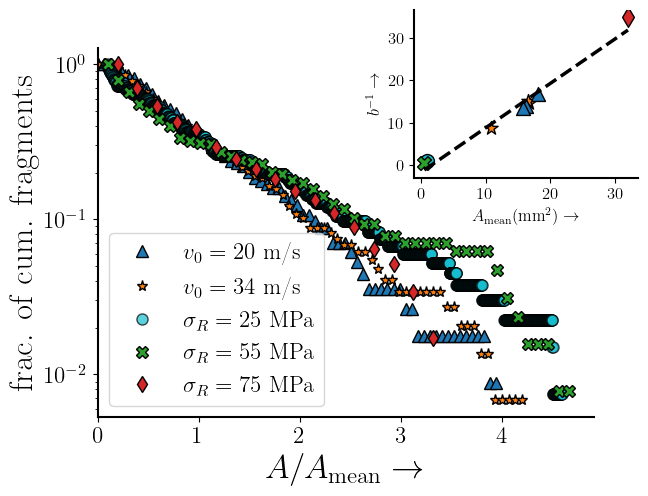

In [115]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

save_dir_path = r'C:\Users\vinee\OneDrive\Documents\MATLAB\experiment_data\area\results\collated'

fig, ax = plt.subplots()

ms = 8
mec = 'black'

# our experiment data
# ax.errorbar(cum_area123/A0, cum_count123/cum_count123[0], yerr=cum_count123_std/cum_count123[0], ecolor='tab:orange', capsize=5,
#             linestyle='none', marker='*', markersize=ms, color='tab:orange', label=r'$v = 34$ m/s', mec=mec)
# ax.errorbar(cum_area678/A0, cum_count678/cum_count678[0], yerr=cum_count678_std/cum_count678[0], ecolor='tab:orange', capsize=5,
#             linestyle='none', marker='^', markersize=ms, color='tab:orange', label=r'$v = 20$ m/s', mec=mec)

Am123= np.mean([np.mean(area1), np.mean(area2), np.mean(area3)])
Am678 = np.mean([np.mean(area6), np.mean(area7), np.mean(area8)])
# ax.plot(cum_area123/Am123, exp_fit(cum_area123, p1[0], p1[1]), color='tab:orange', linestyle='solid')
# ax.plot(cum_area678/Am678, exp_fit(cum_area678, p2[0], p2[1]), color='tab:blue', linestyle='dashed')
ax.plot(cum_area678/Am678, cum_count678/cum_count678[0], color='tab:blue', linestyle='none',
         markersize=ms, marker='^', mec=mec, label = r'$v_0 = 20$ m/s')
ax.plot(cum_area123/Am123, cum_count123/cum_count123[0], color='tab:orange', linestyle='none',
         markersize=ms, marker='*', mec=mec, label =r'$v_0 = 34$ m/s')


# literature data
# plot the data for burggraaf
# ax.plot(cum_area_burggraaf/np.mean(area_burggraaf), exp_fit(cum_area_burggraaf, p_burggraaf[0], p_burggraaf[1]), color='tab:green',
        #  linestyle='dotted')
ax.plot(cum_area_burggraaf/np.mean(area_burggraaf), cum_count_burggraaf/cum_count_burggraaf[0], color='tab:cyan', linestyle='none',
         markersize=ms, marker='o', label=r'$\sigma_R = 25$ MPa', mec=mec, alpha=0.7)

# plot the data for glass 1
# ax.plot(cum_area_glass1/np.mean(area_glass1), exp_fit(cum_area_glass1, p_glass1[0], p_glass1[1]), color='tab:green')
ax.plot(cum_area_glass1/np.mean(area_glass1), cum_count_glass1/cum_count_glass1[0], color='tab:green', linestyle='none',
         markersize=ms, marker='X', label=r'$\sigma_R = 55$ MPa', mec=mec)

# plot the data for glass 2
# ax.plot(cum_area_glass2/np.mean(area_glass2), exp_fit(cum_area_glass2, p_glass2[0], p_glass2[1]), color='tab:green', linestyle='dashed')
ax.plot(cum_area_glass2/np.mean(area_glass2), cum_count_glass2/cum_count_glass2[0], color='tab:red', linestyle='none', 
        markersize=ms, marker='d', label=r'$\sigma_R = 75$ MPa', mec=mec)


# Place the inset slightly outside the main axes (right top)
ax_inset = inset_axes(ax, width="35%", height="35%", loc='upper right', bbox_to_anchor=(0.15, 0.2, 1, 1), bbox_transform=ax.figure.transFigure, borderpad=5)

# When saving, use bbox_inches='tight' to avoid trimming
# Plot the inset with the mean area vs b
read_path = r'C:\Users\vinee\OneDrive\Documents\MATLAB\experiment_data\area\results'
A_mean, b = get_amean_b(read_path)
ax_inset.scatter(A_mean[:3], b[:3], color='tab:orange', marker='*', s=100, edgecolor='black')
ax_inset.scatter(A_mean[3:6], b[3:6], color='tab:blue', marker='^', s=100, edgecolor='black')
ax_inset.scatter(A_mean[6], b[6], color='tab:cyan', marker='o', s=100, edgecolor='black')
ax_inset.scatter(A_mean[7], b[7], color='tab:green', marker='X', s=100, edgecolor='black')
ax_inset.scatter(A_mean[8], b[8], color='tab:red', marker='d', s=100, edgecolor='black')

# Add a trend line
p_trend, _ = np.polyfit(A_mean, b, 1, cov=True)
print(f"Slope of the fit line: {p_trend[0]}")

x_fit = np.linspace(min(A_mean), max(A_mean), 100)
y_fit = np.polyval(p_trend, x_fit)
ax_inset.plot(x_fit, y_fit, color='black', linestyle='--', label='Trend line')

ax_inset.set_xlabel(r'$A_{\rm{mean}} (\rm{mm}^2)\rightarrow$', fontsize=12)
ax_inset.set_ylabel(r'$b^{-1} \rightarrow$', fontsize=12)
ax_inset.tick_params(axis='both', which='major', labelsize=12)
# ax_inset.set_aspect('equal')  # Make the inset square


ax.set_xlabel(r'$A/A_{\rm{mean}}\rightarrow$')
ax.set_ylabel(r'frac. of cum. fragments')
ax.set_xlim(left = 0)
# ax.set_ylim(bottom=1e-3)
ax.set_yscale('log')    # Change to log scale for better visibility of small values

ax.legend(loc = 'lower left')
fig.savefig(save_dir_path + '/experiment_literature_scaled_Amean.png', dpi=300, bbox_inches='tight')
plt.show(block=False)